In [7]:

import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch
import numpy as np
device = 'cuda'
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(1,32,3)
        self.conv2 = nn.Conv2d(32,64,3)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(64*12*12,128)
        self.fc2 = nn.Linear(128,10)

    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,64*12*12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x
net = Net()
net.to(device)

net.load_state_dict(torch.load('../mnist_cnn_net.pth'))

<All keys matched successfully>

In [8]:
a = net.conv2.weight
print(a.shape)
a

torch.Size([64, 32, 3, 3])


Parameter containing:
tensor([[[[ 0.0022,  0.0556, -0.0453],
          [ 0.0292,  0.0354, -0.0303],
          [ 0.0363,  0.0195, -0.0547]],

         [[ 0.0632, -0.0244, -0.0122],
          [-0.0011, -0.0281, -0.0547],
          [ 0.0039, -0.0682, -0.0541]],

         [[-0.0122, -0.0440, -0.0540],
          [-0.0406,  0.0054,  0.0411],
          [ 0.0003, -0.0042,  0.0334]],

         ...,

         [[ 0.0109,  0.0268,  0.0572],
          [ 0.0391, -0.0083,  0.0407],
          [-0.0028,  0.0159,  0.0421]],

         [[ 0.0449, -0.0364,  0.0447],
          [-0.0052, -0.0497, -0.0349],
          [ 0.0160, -0.0400,  0.0516]],

         [[ 0.0270, -0.0255, -0.0520],
          [-0.0231,  0.0219,  0.0109],
          [-0.0622, -0.0472, -0.0321]]],


        [[[-0.0508,  0.0007, -0.0135],
          [ 0.0527, -0.0223, -0.0084],
          [-0.0428, -0.0075, -0.0351]],

         [[-0.0161,  0.0236, -0.0553],
          [-0.0378, -0.0580, -0.0586],
          [ 0.0363, -0.0281,  0.0178]],

         

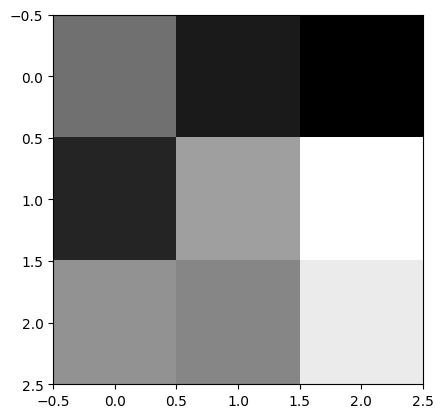

In [9]:
a = net.conv2.weight
a_max ,a_min = a.max(),a.min()
a = (a - a_max)/(a_max-a_min)
plt.imshow(a[0,2,:,:].detach().cpu().numpy(),cmap = 'gray')

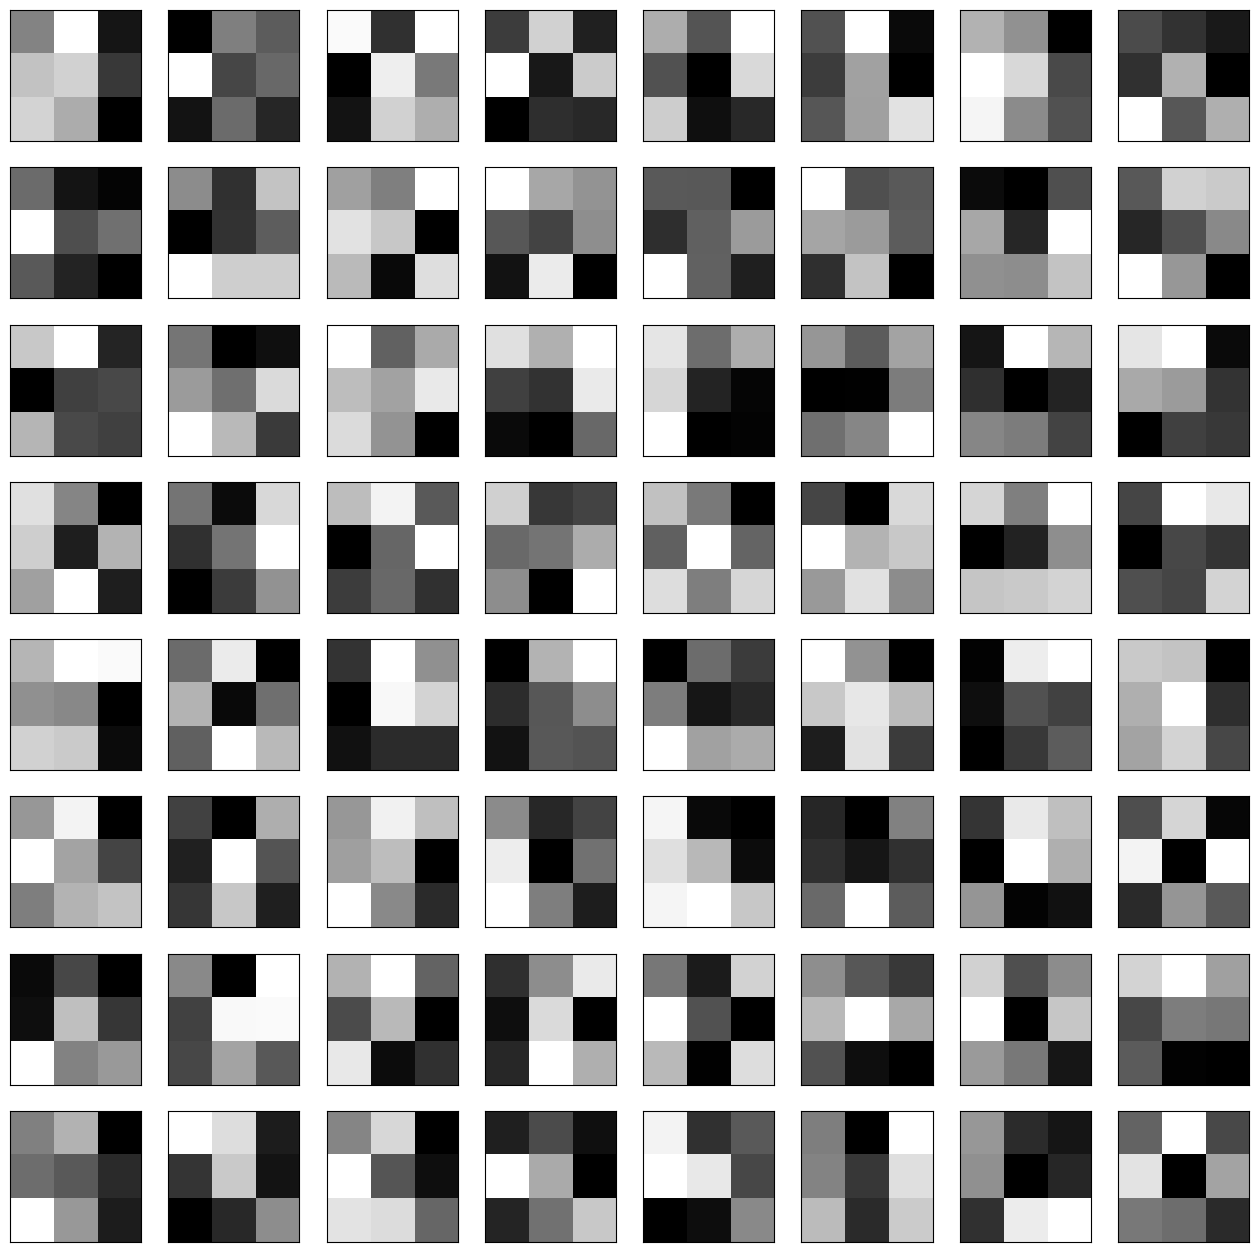

In [10]:
import matplotlib.pyplot as plt
import torch
import numpy as np

# Assuming `weights` is a tensor of shape [64, 32, 3, 3]
weights = a.cpu().detach().numpy()  # Move to CPU and convert to numpy

# Select filters of the first input channel for visualization
filters = weights[:, 0, :, :]  # Shape becomes [64, 3, 3]

# Plot each filter
n_filters = filters.shape[0]
cols = 8  # Filters per row
rows = n_filters // cols + int(n_filters % cols != 0)

plt.figure(figsize=(cols * 2, rows * 2))
for i in range(n_filters):
    ax = plt.subplot(rows, cols, i + 1)
    ax.set_xticks([])  # No x-ticks
    ax.set_yticks([])  # No y-ticks
    plt.imshow(filters[i], cmap='gray')  # Visualize filter in grayscale

plt.show()


In [17]:
b = net.fc1.weight
b[10,20]

tensor(-0.0040, device='cuda:0', grad_fn=<SelectBackward0>)